In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
%matplotlib inline


In [2]:
data=pd.read_csv("melb_data.csv")

In [3]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# REMOVING NAN VALUES BY 3 DIFFER METHODS

In [4]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

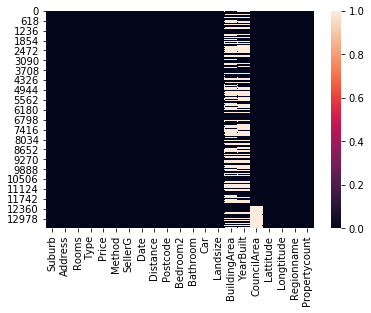

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.8+ MB


In [7]:
x=data.select_dtypes(exclude="object")
x.drop(['Price'],axis=1,inplace=True)
y=data.Price
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

C:\Users\vkoduri\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
def get_mae(x_t,x_v,y_t,y_v):
    model=RandomForestRegressor(n_estimators=100,random_state=1).fit(x_t,y_t)
    p=model.predict(x_v)
    return mean_absolute_error(y_v,p)
    

In [9]:
##method 1 for removing NAN values.....

cols_missing=[cols for cols in x_train.columns if x_train[cols].isnull().any()]
#cols_missing
reduced_x_train=x_train.drop(cols_missing,axis=1)
reduced_x_test=x_test.drop(cols_missing,axis=1)
print('MAE: ')
print(get_mae(reduced_x_train,reduced_x_test,y_train,y_test))
print(x_train.size,reduced_x_train.size)

MAE: 
176556.1092096132
130368 97776


In [12]:
##method 2 for removing NAN values....

from sklearn.impute import SimpleImputer

imp=SimpleImputer()

reduced_x_train=pd.DataFrame(imp.fit_transform(x_train))
reduced_x_test=pd.DataFrame(imp.transform(x_test))

#copying same set of columns names....
reduced_x_train.columns=x_train.columns
reduced_x_test.columns=x_test.columns

print("MAE: ",get_mae(reduced_x_train,reduced_x_test,y_train,y_test))
print(x_train.size,reduced_x_train.size)

MAE:  166684.22007153378
130368 130368


In [13]:
#method 3....using mean() of the column....
for col in cols_missing:
    x_train[col].fillna(value=x_train[col].mean(),inplace=True)
    x_test[col].fillna(value=x_test[col].mean(),inplace=True)
#x_train.isnull().sum()
print("MAE: ",get_mae(x_train,x_test,y_train,y_test))
print(x_train.size,reduced_x_train.size)

C:\Users\vkoduri\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


MAE:  166684.22007153378
130368 130368


In [ ]:
##compare above three mean absolute error and take u r final decision to deal with the NAN values.... 